In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,Item Name_big broccoli,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
546,0.238909,19.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6420,0.612000,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8644,0.327333,29.6,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.7, 0.2, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-01-28 21:51:00.543571: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-28 21:51:00.543590: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-28 21:51:00.543595: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-28 21:51:00.543621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-28 21:51:00.543635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([9460, 150]), TensorShape([1183, 150]), (1183, 150))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,Item Name_big broccoli,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
524,0.5852,7.720000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
282,1.0000,4.366667,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
584,1.0000,4.900000,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(150, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 150))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=5e-5), loss='mae', metrics=['mae'])

epoch_number = 20

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


2024-01-28 21:51:06.532754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


296/296 [==============================] - 7s 18ms/step - loss: 0.4480 - mae: 0.4480 - val_loss: 0.3106 - val_mae: 0.3106
Epoch 2/20
296/296 [==============================] - 5s 16ms/step - loss: 0.2626 - mae: 0.2626 - val_loss: 0.1994 - val_mae: 0.1994
Epoch 3/20
296/296 [==============================] - 5s 16ms/step - loss: 0.1891 - mae: 0.1891 - val_loss: 0.1669 - val_mae: 0.1669
Epoch 4/20
296/296 [==============================] - 5s 15ms/step - loss: 0.1739 - mae: 0.1739 - val_loss: 0.1553 - val_mae: 0.1553
Epoch 5/20
296/296 [==============================] - 4s 15ms/step - loss: 0.1587 - mae: 0.1587 - val_loss: 0.1366 - val_mae: 0.1366
Epoch 6/20
296/296 [==============================] - 4s 15ms/step - loss: 0.1375 - mae: 0.1375 - val_loss: 0.1186 - val_mae: 0.1186
Epoch 7/20
296/296 [==============================] - 4s 15ms/step - loss: 0.1196 - mae: 0.1196 - val_loss: 0.1060 - val_mae: 0.1060
Epoch 8/20
296/296 [==============================] - 4s 15ms/step - loss: 0.111

In [8]:
import matplotlib.pyplot as plt

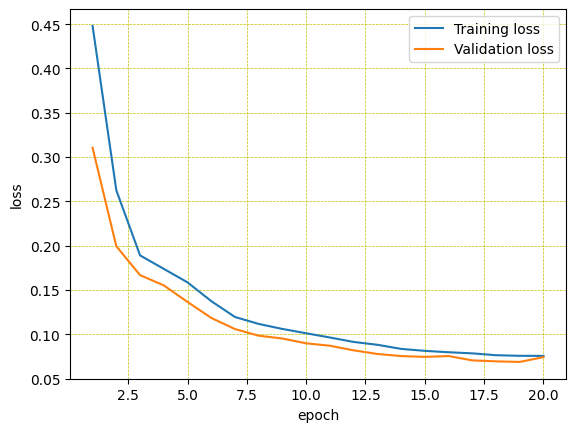

In [9]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training loss')
plt.plot(x_range, val_loss, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [11]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(150, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 150))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.Dense(32, activation='relu'))
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='relu'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=5e-5), loss='mae', metrics=['mae'])

epoch_number = 12

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/12
296/296 [==============================] - 6s 17ms/step - loss: 0.4324 - mae: 0.4324 - val_loss: 0.2950 - val_mae: 0.2950
Epoch 2/12
296/296 [==============================] - 5s 15ms/step - loss: 0.2489 - mae: 0.2489 - val_loss: 0.1825 - val_mae: 0.1825
Epoch 3/12
296/296 [==============================] - 4s 15ms/step - loss: 0.1813 - mae: 0.1813 - val_loss: 0.1608 - val_mae: 0.1608
Epoch 4/12
296/296 [==============================] - 4s 15ms/step - loss: 0.1626 - mae: 0.1626 - val_loss: 0.1397 - val_mae: 0.1397
Epoch 5/12
296/296 [==============================] - 4s 15ms/step - loss: 0.1363 - mae: 0.1363 - val_loss: 0.1137 - val_mae: 0.1137
Epoch 6/12
296/296 [==============================] - 5s 16ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.0988 - val_mae: 0.0988
Epoch 7/12
296/296 [==============================] - 4s 15ms/step - loss: 0.1012 - mae: 0.1012 - val_loss: 0.0911 - val_mae: 0.0911
Epoch 8/12
296/296 [==============================] - 4s 15ms/step - 

In [12]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 reshape_2 (Reshape)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            142848    
                                                                 
 dense_11 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_12 (Dense)            (None, 1, 32)             2080      
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_13 (Dense)            (None, 4)                

In [13]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

37/37 [==============================] - 0s 8ms/step - loss: 0.0904 - mae: 0.0904


[0.0903690978884697, 0.0903690978884697]

In [14]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

37/37 [==============================] - 1s 7ms/step


array([[0.17497046],
       [0.26375017],
       [0.3980878 ],
       [0.37304384],
       [0.31077904]], dtype=float32)

In [15]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.2404    , 0.2775    , 0.43416667, 0.36781818, 0.259     ],
      dtype=float32)>

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_test_tensor, y_predictions)

0.18970135

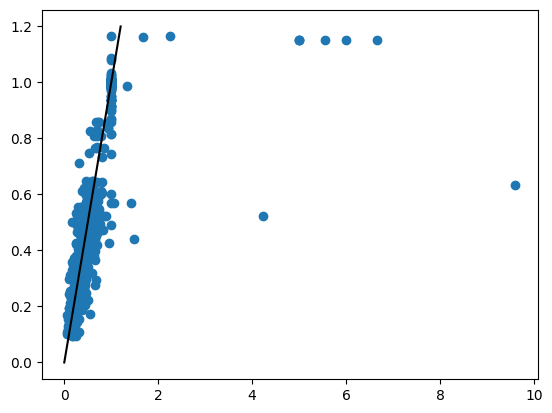

In [18]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [19]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
